In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
housing= pd.read_csv('housing.csv')
# housing.head()
# housing.tail()
# housing[2:7]
# housing[:8]
# housing[-5:]
# housing[:]
# housing.shape
# housing.info()
# housing.columns
# housing['ocean_proximity'].unique()
# housing['ocean_proximity'].value_counts()
# housing['population'][housing['ocean_proximity']=='INLAND']
# housing.describe()
# housing.hist(bins=50, figsize=(20,15))
# plt.show()}
train_set,test_set=train_test_split(housing,test_size=0.2, random_state=42)
train_set.shape
test_set.shape
train_set.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11363,-117.94,33.74,24.0,4248.0,840.0,3118.0,798.0,4.2222,207200.0,<1H OCEAN
14423,-117.23,32.81,28.0,1508.0,263.0,996.0,267.0,3.8026,270000.0,NEAR OCEAN
4426,-118.25,34.07,18.0,4297.0,1420.0,4332.0,1286.0,2.2545,192500.0,<1H OCEAN
16850,-122.42,37.62,40.0,1545.0,264.0,756.0,282.0,4.4643,308100.0,NEAR OCEAN
6265,-117.94,34.05,34.0,1729.0,324.0,1341.0,324.0,3.7708,163500.0,<1H OCEAN
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
15795,-122.42,37.77,52.0,4226.0,1315.0,2619.0,1242.0,2.5755,325000.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

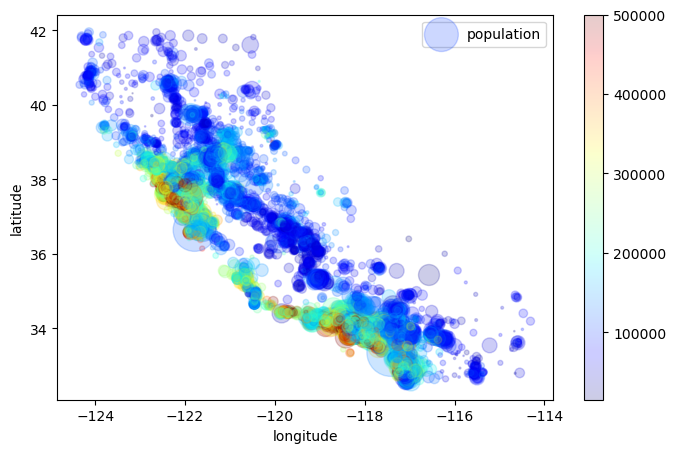

In [3]:
data=train_set.loc[:, 'longitude':'median_house_value'].copy()
data[:]
data.plot(kind='scatter',x='longitude',y='latitude', 
         s=data['population']/30, label='population',
      c=data['median_house_value'], cmap=plt.get_cmap('jet'),
          figsize=(8,5), alpha=0.2, )

In [4]:
train_set.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
# standard correlation coefficient [-1 , 1]  
corr_matrix=data.corr()
# print(corr_matrix)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [5]:

train_set.loc[:, 'longitude':'median_house_value']



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


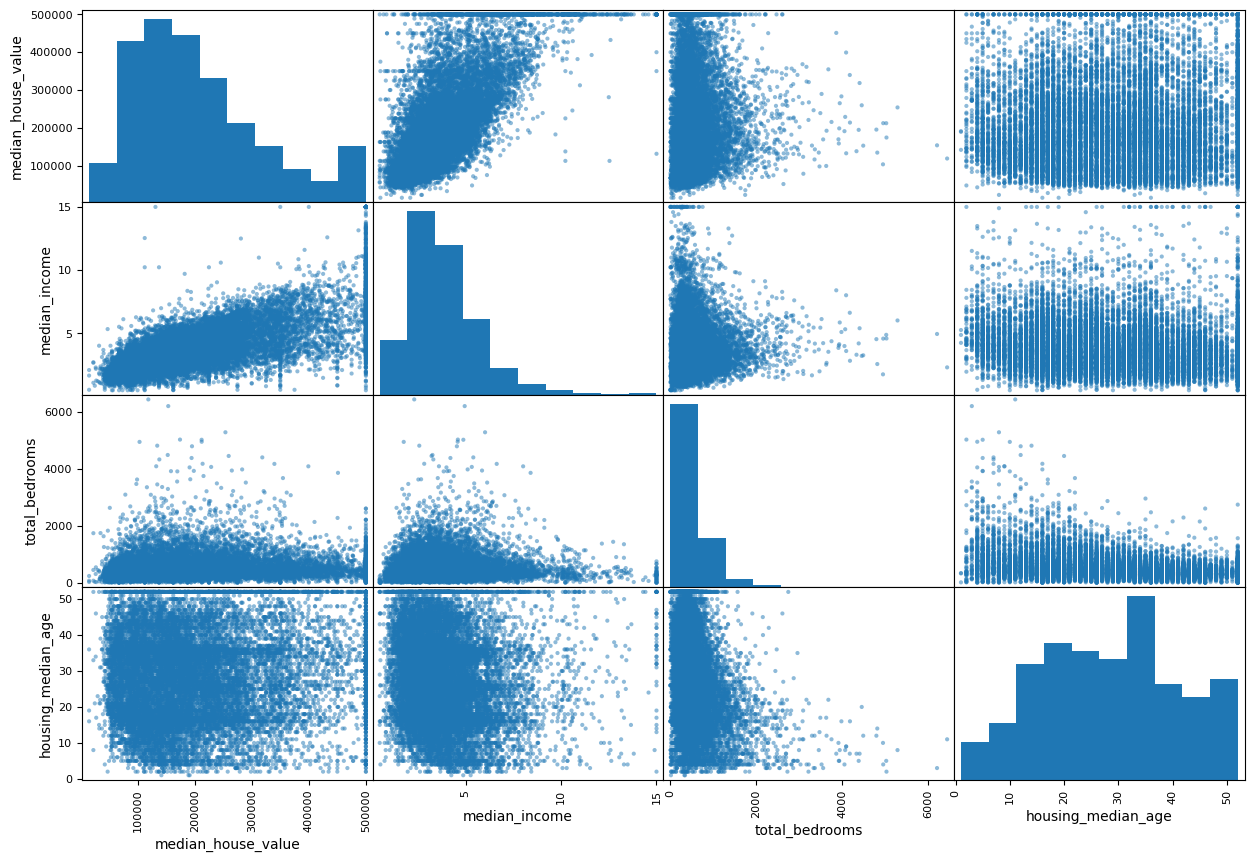

In [6]:
features = ['median_house_value', 'median_income','total_bedrooms','housing_median_age']
scatter_matrix(data[features], figsize=(15,10))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

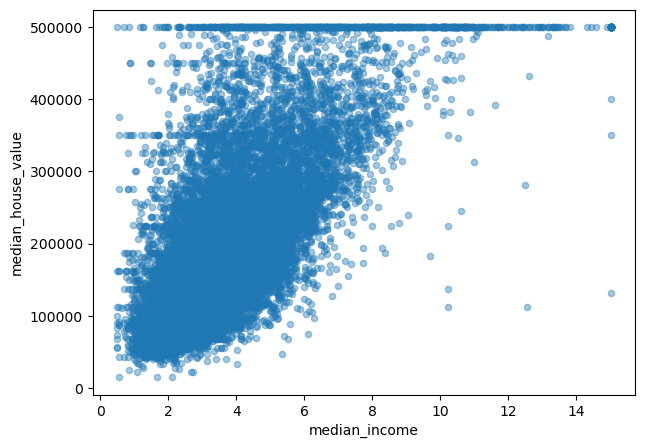

In [7]:
data.plot(kind='scatter',x='median_income',y='median_house_value',figsize=(7,5),alpha=0.4)

In [8]:
data['population_per_households']=data['population']/data['households']
data['total_rooms_per_households']=data['total_rooms']/data['households']
data['total_bedrooms_per_total_rooms']=data['total_bedrooms']/data['total_rooms']
# data=data.drop('Mostafa',axis=1) this command is equal with below command (drop and delete)
# del data['Mostafa']
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_households,total_rooms_per_households,total_bedrooms_per_total_rooms
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,3.691814,5.017657,0.200576
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,1.738095,4.473545,0.232703
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,2.723214,5.645833,0.174486
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,3.994366,4.002817,0.258269
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,2.300000,6.268421,0.180940


In [9]:
corr_matrix=data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)



median_house_value                1.000000
median_income                     0.690647
total_rooms_per_households        0.158485
total_rooms                       0.133989
housing_median_age                0.103706
households                        0.063714
total_bedrooms                    0.047980
population_per_households        -0.022030
population                       -0.026032
longitude                        -0.046349
latitude                         -0.142983
total_bedrooms_per_total_rooms   -0.257419
Name: median_house_value, dtype: float64

<Axes: xlabel='total_bedrooms_per_total_rooms', ylabel='median_house_value'>

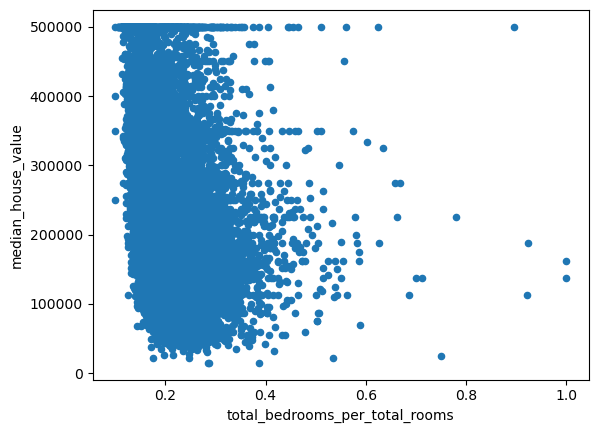

In [10]:
data.plot(kind='scatter',x='total_bedrooms_per_total_rooms',y='median_house_value')

In [11]:
# step fourth , Prepare the data
# data : 1- Numerical(missing value)    2-Categorical and text data (LabelEncoder, OneHotEncoder)
# Numerical data : Feature Scaling    ,    Custom Transformers
df=train_set.copy()
df_label= df['median_house_value'].copy()
df=df.drop('median_house_value',axis=1)
df_num=df.drop('ocean_proximity',axis=1)
df_num.head()

# ----------missing data (1- drop rows    2-drop columns   3-replace)
# df_num= df_num.dropna(subset=['total_bedrooms'])............drop Nan rows
# df_num= df_num.drop('total_bedrooms', axis=1)...............drop Nan columns
# median=df_num['total_bedrooms'].median() ........... manually replacement of Nan data with median
# df_num['total_bedrooms'].fillna(median)


# ========================== SimpleImputer function ==========================
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df_num)
x=imputer.transform(df_num)
df_num_impute_tr=pd.DataFrame(x, columns=df_num.columns)
df_num_impute_tr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [12]:
# ======================== Custom Transformers ====================================

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class combinedAttributesAdder (BaseEstimator, TransformerMixin):
          def fit(self, x, y=None):
            return self
          def transform(self, x, y=None):
            rooms_per_household= x[:, rooms_ix] / x[:, household_ix]
            population_per_household = x[:, population_ix] / x[:, household_ix]
            bedrooms_per_room = x[:, bedrooms_ix] / x[:, rooms_ix]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]

custom = combinedAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns = list(df_num_impute_tr.columns)
columns.append('rooms_per_household')
columns.append('population_per_household')
columns.append('bedrooms_per_room')
data_custom_tr.columns = columns
data_custom_tr.head(10)
                

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,3.691814,0.200576
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,1.738095,0.232703
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,2.723214,0.174486
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,3.994366,0.258269
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,2.300000,0.180940
5,-121.86,37.42,20.0,5032.0,808.0,2695.0,801.0,6.6227,6.282147,3.364544,0.160572
6,-117.97,34.04,28.0,1686.0,417.0,1355.0,388.0,2.5192,4.345361,3.492268,0.247331
7,-122.53,37.91,37.0,2524.0,398.0,999.0,417.0,7.9892,6.052758,2.395683,0.157686
8,-117.90,34.13,5.0,1126.0,316.0,819.0,311.0,1.5000,3.620579,2.633441,0.280639
9,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266,6.730284,3.394671,0.153130


In [13]:
# =============================== Feature Scaling ===========================
#  Standardization           Normalization [0,1]

from sklearn.preprocessing import StandardScaler

feature_scal = StandardScaler()
data_num_scaled_tr = pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns=data_custom_tr.columns)
data_num_scaled_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364


In [14]:
# ============================= LabelEncoder ==============================

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_cat = df['ocean_proximity']
data_cat_encoded = encoder.fit_transform(data_cat)
data_cat_encoded = pd.DataFrame(data_cat_encoded, columns=['ocean_proximity'])
data_cat_encoded.head()

,ocean_proximity
0,4
1,4
2,4
3,4
4,1


In [15]:
# ========================= OneHotEncoder ==========================

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

encoder_1hot = OneHotEncoder(sparse=False)
data_cat_1hot_tmp = encoder_1hot.fit_transform(df[['ocean_proximity']])
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp)
data_cat_1hot.columns = encoder_1hot.get_feature_names_out()
data_cat_1hot.head()



C:\Users\baran\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [16]:
#  stick categorical data to numerical data with concat 

final = pd.concat([data_num_scaled_tr, data_cat_1hot], axis=1)
final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0


In [17]:
# ==================== Create Pipeline ============================

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
            return self
    def transform(self, x, y=None):
            rooms_per_household= x[:, rooms_ix] / x[:, household_ix]
            population_per_household = x[:, population_ix] / x[:, household_ix]
            bedrooms_per_room = x[:, bedrooms_ix] / x[:, rooms_ix]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]
        
class DataFrameSelector (BaseEstimator, TransformerMixin):
    def __init__ (self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.attribute_names].values
    
df = train_set.copy()
df_label = df['median_house_value'].copy()
df = df.drop('median_house_value', axis=1)

df_num = df.drop(['ocean_proximity'], axis=1)
num_attrs = list(df_num)
cat_attrs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrs)),
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(df)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','rooms_per_household','population_per_household','bedrooms_per_room','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'])

housing_prepared_df.head()


C:\Users\baran\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0


In [18]:
# Linear Regression Algorithm (fit and prediction)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df, df_label)

sample_data_prepared = housing_prepared_df.iloc[:4]
print('predictions:\t', lin_reg.predict(sample_data_prepared))

sample_labels = df_label.iloc[:4]
print('Labels:\t\t', list(sample_labels))


predictions:	 [181746.54359616 290558.74973505 244957.50017771 146498.51061398]
Labels:		 [103000.0, 382100.0, 172600.0, 93400.0]


In [19]:
# RMSE ==> Root Mean Squarad Error  # پارامتر برای مقایسه داده های پیش بینی شده

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared_df)
lin_mse = mean_squared_error(df_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67593.20745775253

In [20]:
# Decision Tree Regression  ------------- because we use the same data, the result of RMSE is not correct (0.0) 
# and in this algorithm we should test with different data for taking correct result, we do this in the following cell

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df, df_label)
housing_predictions = tree_reg.predict(housing_prepared_df)
tree_mse = mean_squared_error(df_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

In [21]:
# Cross Validation for the Decission Tree Algorithm (Overfitting) for gathering correct result of this Algorithm

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared_df, df_label, scoring= 'neg_mean_squared_error', cv=10)
trees_rmse_scores = np.sqrt(-scores)

def display_scores(scores, model_name):
    print('=================', model_name, '==================')
    print('scores:', scores)
    print('\n\nMean:', scores.mean())
    print('standard deviation:', scores.std())
    print('====================================================')
    
display_scores(trees_rmse_scores, 'Decission Tree Regression')   

================= Decission Tree Regression ==================
scores: [64958.8530597  70772.86513997 67350.8896332  71389.71757424
 75286.85211694 67365.1557727  69005.78169696 66350.34364764
 66437.73980698 71226.47651623]


Mean: 69014.4674964562
standard deviation: 2977.2882590550307


In [22]:
# Cross validation for Linear Regression (Underfitting) for gathering more exact result for this Algorithm
linear_scores = cross_val_score(lin_reg, housing_prepared_df, df_label, scoring= 'neg_mean_squared_error', cv=10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores, 'Linear Regression')   

================= Linear Regression ==================
scores: [65000.67382615 70960.56056304 67122.63935124 66089.63153865
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555996 68957.34111906]


Mean: 67828.38677377408
standard deviation: 2468.0913950652257


In [23]:
# RandomForestRegressor Algorithm

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_df, df_label)
forest_scores = cross_val_score(forest_reg, housing_prepared_df, df_label, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores, 'Random Forest Regression')

================= Random Forest Regression ==================
scores: [46847.49591078 51632.89268373 49504.44620776 51762.0910272
 52418.69845388 47323.62863165 47514.66123065 50853.70468412
 49526.89183978 49924.04598424]


Mean: 49730.85566537874
standard deviation: 1880.9348450090663
